<a href="https://colab.research.google.com/github/gani88/ForecastingTimeSeries/blob/main/Forecasting_3_Seasonality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seasonality

Next is I learn about seasonality in Time Series. So what is this ?

Seasonality in the context of time series analysis refers to a pattern of regular, recurring changes in the mean (average) of a series over a specific period of time. This pattern is characterized by distinct cycles that repeat at consistent intervals. When seasonality is present in a time series, you can observe certain behaviors or patterns that occur predictably over time.

**Periodic and Repetitive Changes**

Seasonal changes are periodic in nature, meaning they occur at fixed and predictable intervals. These intervals can be daily, weekly, monthly, yearly, or any other defined time period. The key aspect is that the changes repeat in a cycle.


---


**Clock and Calendar Influence**

Seasonal patterns often follow the rhythms of the clock and calendar. This means that the changes in the time series tend to synchronize with the passage of time on a clock (hours, days) and calendar (weeks, months, years). For example, you might notice specific patterns that repeat every day, every week, or every year.


---


**Natural and Social Influences**

The reasons behind seasonality can vary. Natural influences include cycles driven by the natural world, such as the changing seasons, variations in daylight hours, or environmental factors that follow regular cycles over days or years. On the other hand, social influences involve human behaviors, practices, and conventions that are associated with specific dates and times. For instance, shopping patterns might show seasonality around holidays or weekends.


---

Here are a few examples of how seasonality can manifest:

- A ice cream vendor might experience higher sales during summer months and lower sales during colder months, creating a yearly seasonal pattern.
- Retail stores often see increased sales leading up to holidays like Christmas or back-to-school season.
- Energy consumption might follow daily patterns with higher usage during daytime hours and lower usage at night.
- Traffic congestion might exhibit daily patterns with higher congestion during rush hours.

In summary, seasonality in a time series refers to regular and predictable patterns of change in the mean over defined time periods. These patterns can be influenced by both natural cycles and social behaviors, leading to recurring variations in the data that align with the clock and calendar.

## 2 Features
There are two features in this kind of seasonality.

**Indicators**

Indicators refer to a type of feature that is particularly suitable when dealing with a season that has relatively few observations. This often occurs when you're analyzing a shorter period of time with a repeating pattern, such as a weekly season with daily observations. In this context, an indicator feature essentially acts as a binary flag that indicates whether a specific day belongs to a certain period within the repeating cycle.

Example: In a retail context, if you're looking at daily sales data and you want to capture the difference between weekdays and weekends, you might create indicator features that take the value 1 for weekends (Saturday and Sunday) and 0 for weekdays.


---


**Fourier Features**

Fourier features are another type of feature that is particularly effective when dealing with a season that has a large number of observations. This is often the case for longer periods with multiple cycles, such as an annual season with daily observations. Fourier features are based on Fourier analysis, which involves decomposing complex patterns into a sum of simpler trigonometric functions.

Example: Imagine you're analyzing annual temperature data. Fourier features can help capture the complex variations in temperature over the course of a year by using multiple sinusoidal components. These components can effectively model different frequencies and amplitudes of the seasonal pattern.

## Seasonal Plots and Plot Periodogram

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

In [6]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(12, 6))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10
)

plot_params=dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False
)

def seasonal_plot(X, y, period, freq, ax=None):
  if ax is None:
    _, ax = plt.subplots()

  palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
  ax = sns.lineplot(
      x=freq,
      y=y,
      hue=period,
      data=X,
      ci=False,
      ax=ax,
      palette=palette,
      legend=False
  )

  ax.set_title(f"Seasonal Plot ({period}/{freq})")
  for line, name in zip(ax.lines, X[period].unique()):
      y_ = line.get_ydata()[-1]
      ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
  return ax


from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False
)
%config InlineBackend.figure_format = 'retina'


# annotations: https://stackoverflow.com/a/49238256/5769929
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

tunnel = pd.read_csv("/content/tunnel.csv", parse_dates=["Day"])
tunnel = tunnel.set_index("Day").to_period("D")

<ipython-input-6-d22239373a64>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


<Axes: title={'center': 'Seasonal Plot (year/dayofyear)'}, xlabel='dayofyear', ylabel='NumVehicles'>

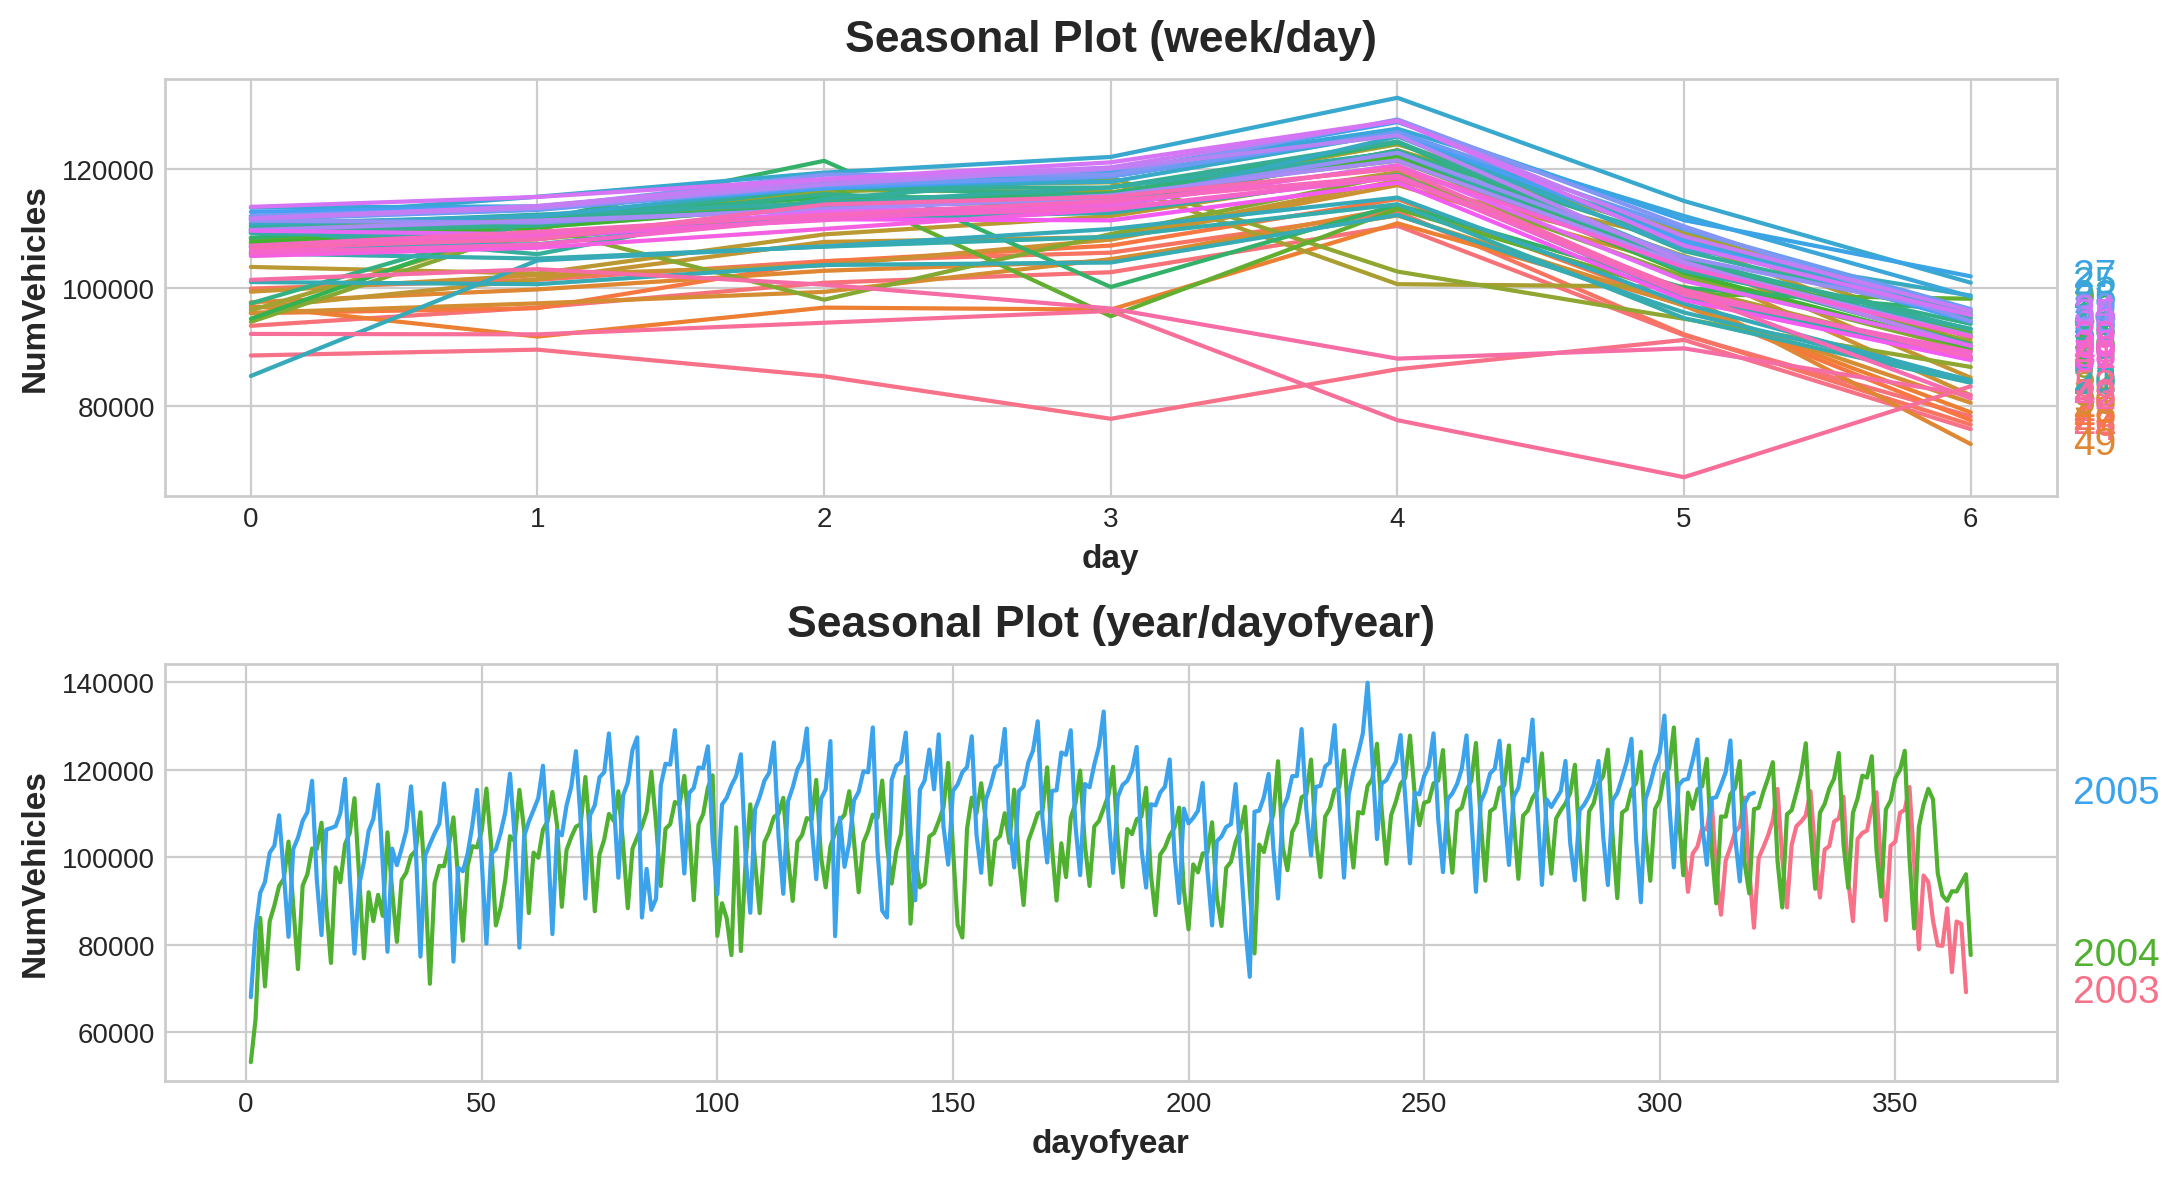

In [9]:
X = tunnel.copy()

X["day"] = X.index.dayofweek
X["week"] = X.index.week

X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y="NumVehicles", period="week", freq="day", ax=ax0)
seasonal_plot(X, y="NumVehicles", period="year", freq="dayofyear", ax=ax1)

<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

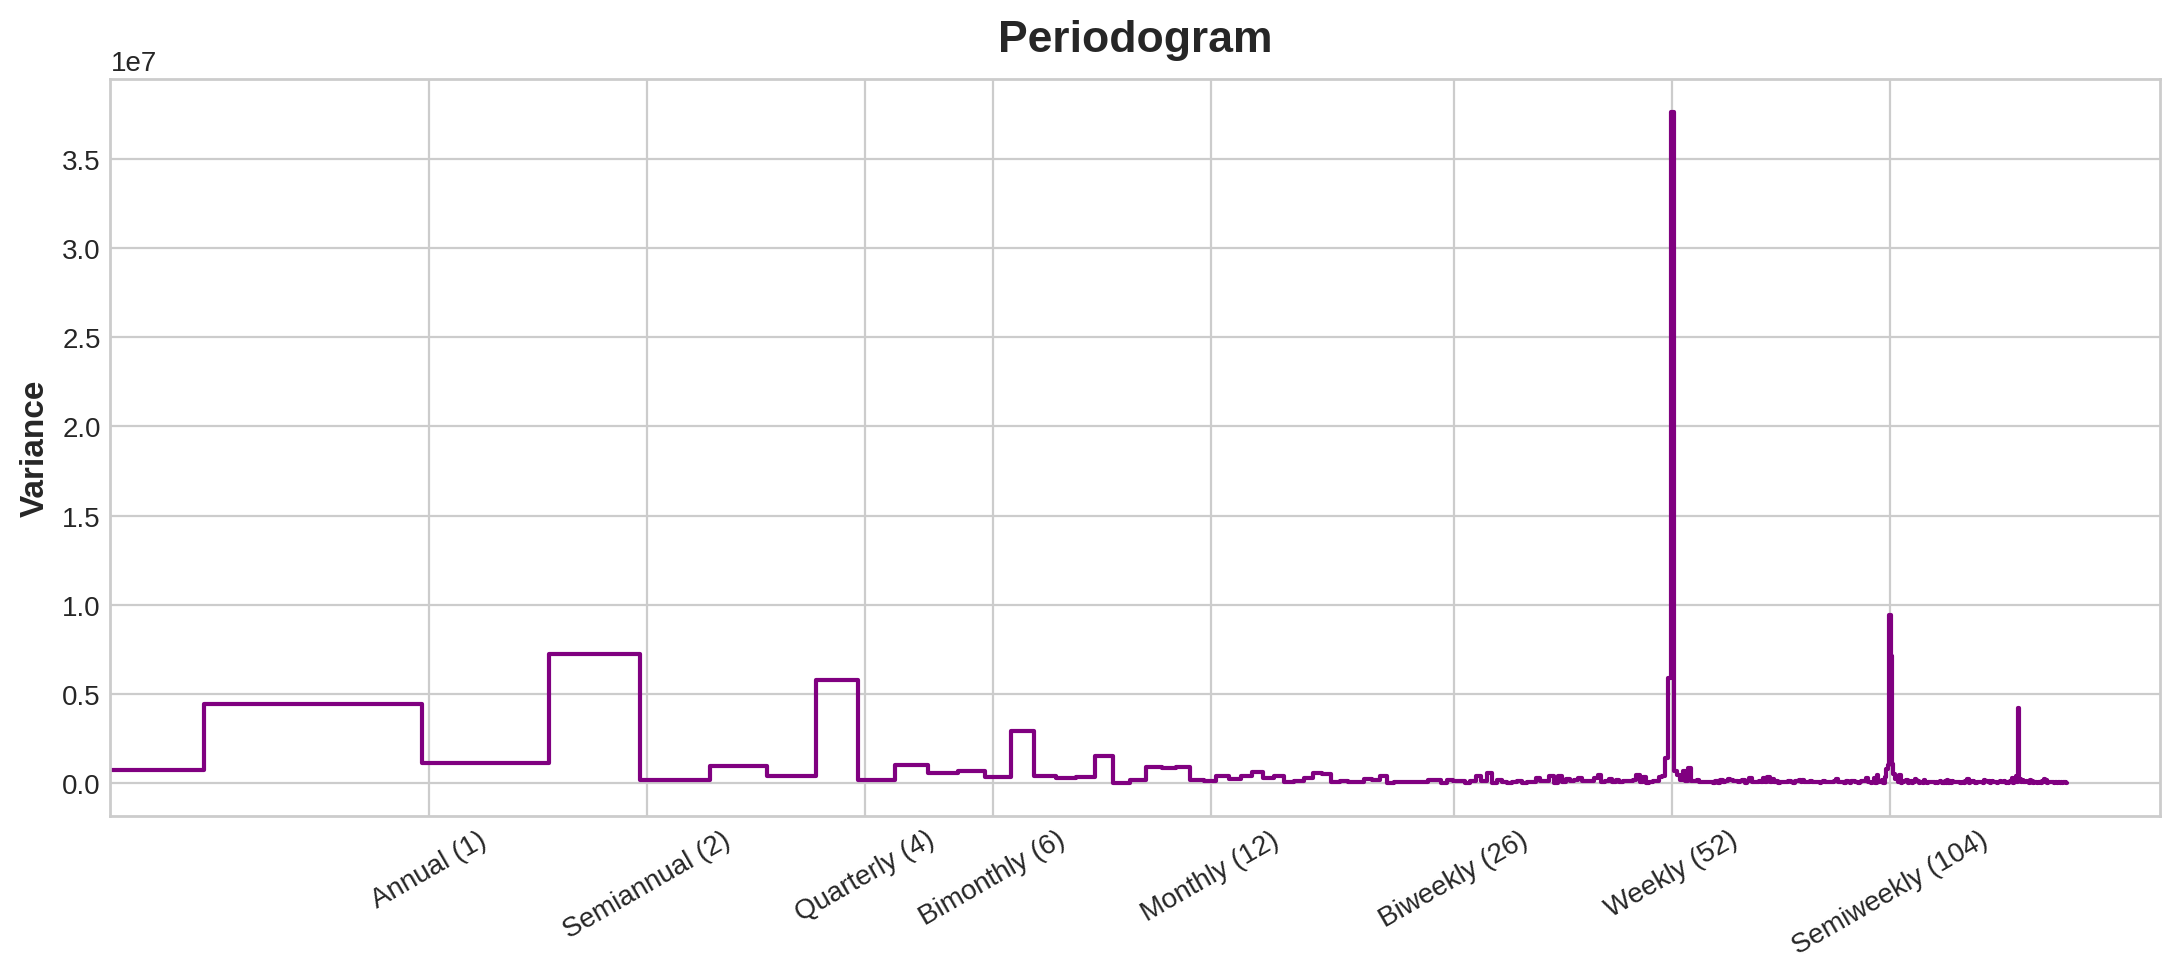

In [10]:
plot_periodogram(tunnel.NumVehicles)

In [12]:
fourier = CalendarFourier(freq="A", order=10)

dp = DeterministicProcess(
    index=tunnel.index,
    constant=True,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True
)

X = dp.in_sample()

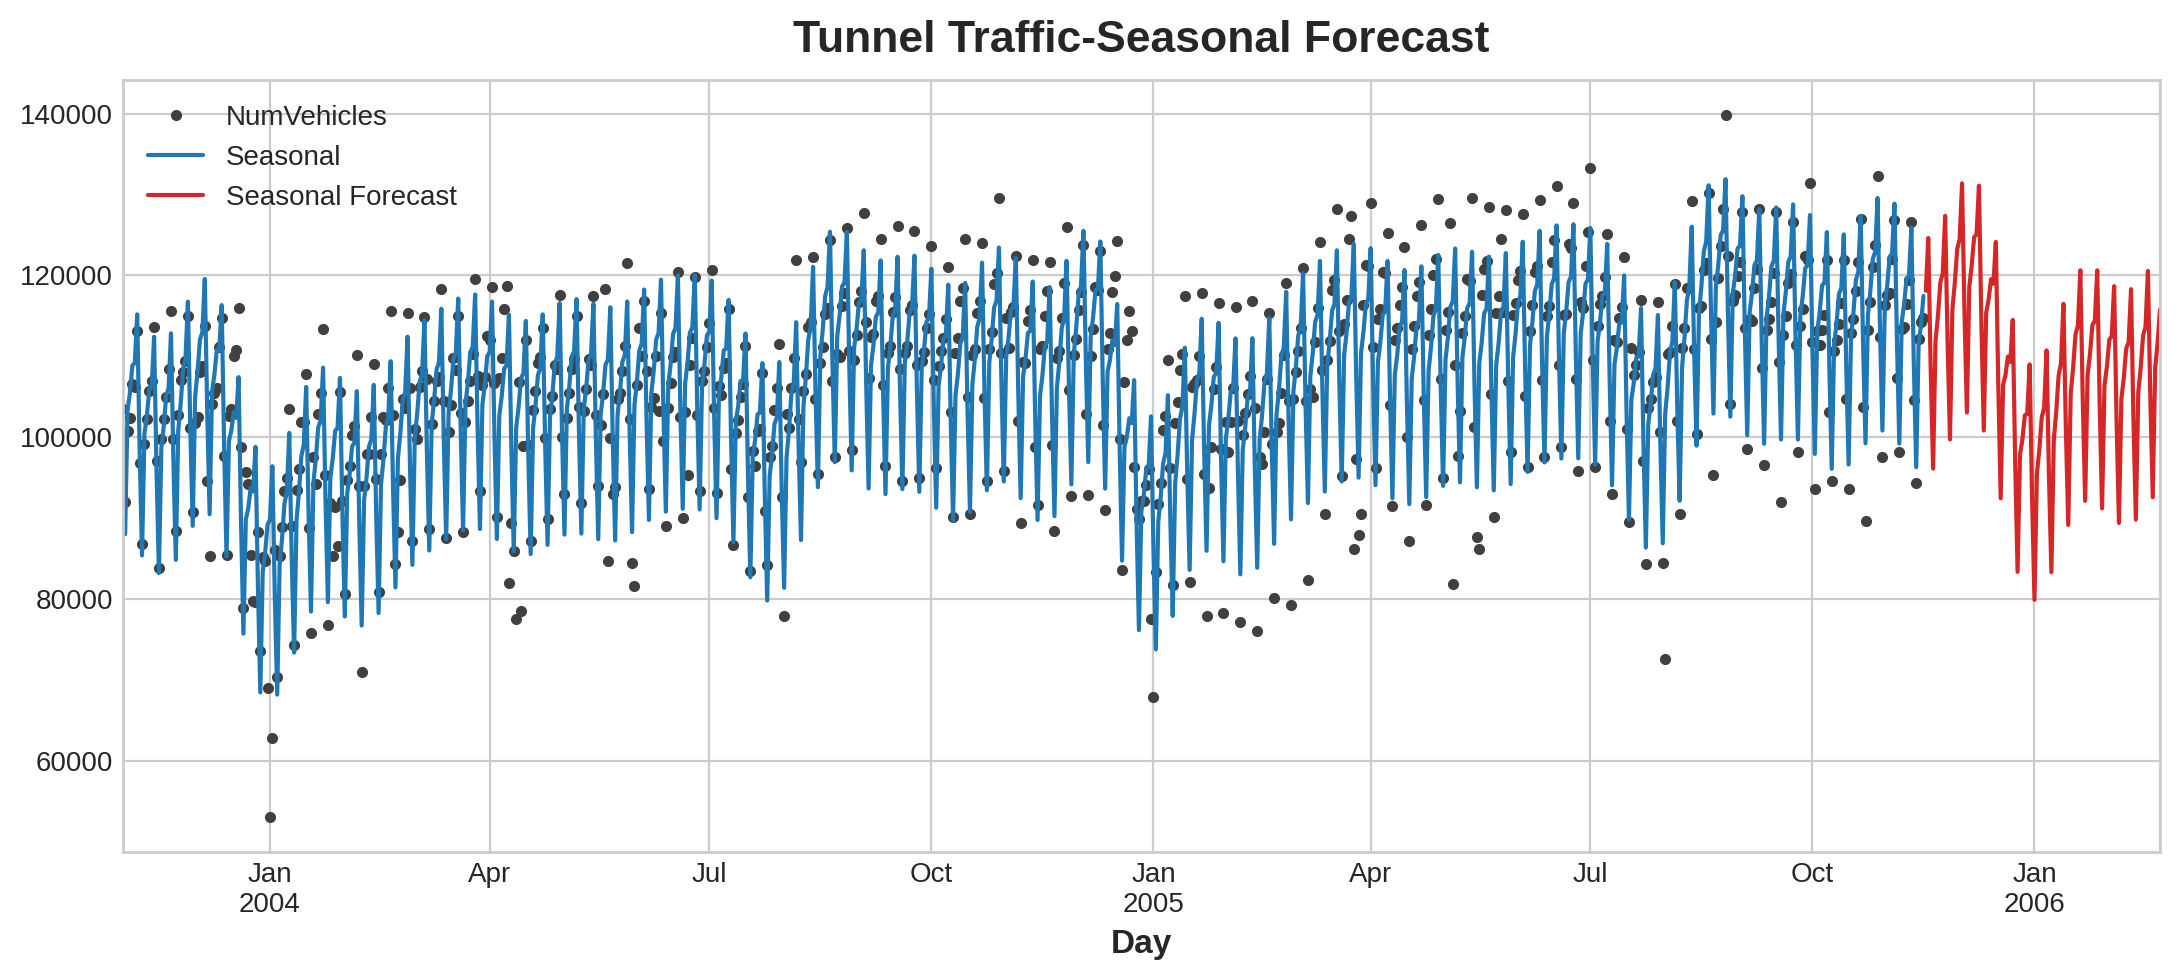

In [13]:
y = tunnel["NumVehicles"]

model = LinearRegression(fit_intercept=False)
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_cast = dp.out_of_sample(steps=98)
y_cast = pd.Series(model.predict(X_cast), index=X_cast.index)

ax = y.plot(color='0.25', style='.', title="Tunnel Traffic-Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax = y_cast.plot(ax=ax, label="Seasonal Forecast", color="C3")
_ = ax.legend()